In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [12]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


X is the predictor which is a matrix which is why convention is capital X.
y is a response vector and hence lower case 

In [19]:
X = iris.data
y = iris.target
X.shape
y.shape

(150,)

## scikit learn four step modeling pattern

## step 1: 
### import the class you plan to use

In [23]:
from sklearn.neighbors import KNeighborsClassifier

## step 2:
### instantiate the estimator
* estimator is the term used for model

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)

## step 3:
### fit the model with data aka training

In [32]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

## step 4:
### predict the response for new observation

In [39]:
knn.predict([[3,4,5,6]])

array([2])

## train-test split

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.95


## Finding maximum score for different K values

In [90]:


k_range = np.arange(1,26)
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
i_max = np.argmax(scores)
print("Best K ->",k_range[i_max])
print("Best score->",scores[i_max])

Best K -> 5
Best score-> 0.9833333333333333


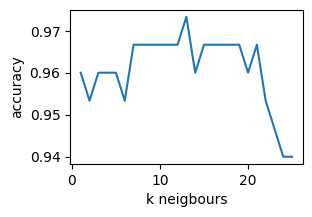

In [117]:
from matplotlib import pyplot as plt
plt.figure(figsize=(3,2))
plt.plot(k_range, scores)
plt.xlabel("k neigbours")
plt.ylabel("accuracy")
plt.show()

## Kfolds and cross_val_score

In [104]:
from sklearn.model_selection import KFold, cross_val_score

In [108]:
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
results = cross_val_score(knn, X, y, cv = kfold, scoring='accuracy')
print(results.mean())

0.9600000000000002


## Finding optimal value of K using kfold and cross_val_score

In [137]:
k_range = np.arange(1,26)
scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    results = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')
    scores.append(results.mean())
i_max = np.argmax(scores)
print("Best Score: ", scores[i_max])
print("Best K: ", k_range[i_max])

Best Score:  0.9733333333333334
Best K:  13


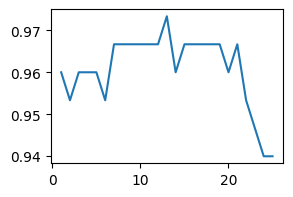

In [138]:
plt.figure(figsize=(3,2))
plt.plot(k_range,scores)